To me, the best data scientist skill, is to choose the right decisions based on the data. In this notebook, I will be searching for meaningful questions based on my interest profile.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')

In [2]:
df = pd.read_pickle('../../data/interim/interest_SO_survey_2023.pkl')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
df.head()

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,RemoteWork,TargetAIDeveloper,TargetAISearch,TargetCollabTools,TargetDatabase,TargetFramework,TargetLanguage,TargetLibraries,TargetPlatform,TargetTools,WorkedAIDeveloper,WorkedAISearch,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,Other,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),DevOps function;Microservices;Automated testin...,Remote,GitHub Copilot,ChatGPT;Neeva AI,Vim;Visual Studio Code,Firebase Realtime Database;Supabase,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Fly.io;Netlify;Render,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,GitHub Copilot,ChatGPT,Vim;Visual Studio Code,Supabase,Next.js;React;Remix;Vue.js,HTML/CSS;JavaScript;Python,Electron;React Native;Tauri,Amazon Web Services (AWS);Netlify;Vercel,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,10.0,285000.0,18.0,9.0,Other (please explain),Indifferent,Somewhat distrust,Yes
2,45-54 years old,Start a free trial;Ask developers I know/work ...,United States of America,NaN,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,MacOS;Other Linux-based,MacOS;Other Linux-based,DevOps function;Microservices;Automated testin...,"Hybrid (some remote, some in-person)",NaN,NaN,Emacs;Helix,NaN,NaN,Haskell;OCaml;Rust,NaN,NaN,Cargo;Kubernetes;Nix,NaN,NaN,Emacs;Helix,NaN,NaN,Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,Cargo;Docker;Kubernetes;Make;Nix,23.0,250000.0,27.0,23.0,NaN,NaN,NaN,"No, and I don't plan to"
3,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,NaN,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",NaN,I am a developer by profession,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,Automated testing;Continuous integration (CI) ...,"Hybrid (some remote, some in-person)",NaN,NaN,IntelliJ IDEA;Vim;WebStorm,PostgreSQL;Redis,Node.js;Ruby on Rails;Vue.js,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,NaN,Cloudflare;Heroku,Homebrew;npm;Vite,NaN,NaN,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,PostgreSQL;Redis,Node.js;React;Ruby on Rails;Vue.js;WordPress,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,NaN,Cloudflare;Heroku,Homebrew;npm;Vite;Webpack;Yarn,7.0,156000.0,12.0,7.0,NaN,NaN,NaN,"No, and I don't plan to"
4,25-34 years old,Start a free trial;Ask developers I know/work ...,Philippines,Other;Codecademy;edX,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",Other,I am a developer by profession,Other (Please Specify):,Other (Please Specify):,Microservices;Automated testing;Observability ...,Remote,NaN,ChatGPT,Vim;Visual Studio Code,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,HTML/CSS;JavaScript;Python;Rust;TypeScript,NaN,Amazon Web Services (AWS);Cloudflare;Digital O...,Docker;npm;Yarn,NaN,ChatGPT,Vim;Visual Studio Code,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Express;Gatsby;NestJS;Next.js;Node.js;React,HTML/CSS;JavaScript;TypeScript,NaN,Amazon W

In [4]:
NotWorking = df['CurrentJob'].isna().sum()

In [5]:
ML_df = df.loc[df['CurrentJob'].str.contains('Data scientist', na=False)]

In [6]:
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 21 to 87951
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1588 non-null   object 
 1   BuyNewTool         1500 non-null   object 
 2   Country            1588 non-null   object 
 3   CoursesCert        829 non-null    object 
 4   CurrentJob         1588 non-null   object 
 5   EdLevel            1588 non-null   object 
 6   Employment         1588 non-null   object 
 7   Industry           760 non-null    object 
 8   MainBranch         1588 non-null   object 
 9   OSPersonal         1569 non-null   object 
 10  OSProffesional     1455 non-null   object 
 11  ProfessionalTech   857 non-null    object 
 12  RemoteWork         1515 non-null   object 
 13  TargetAIDeveloper  371 non-null    object 
 14  TargetAISearch     984 non-null    object 
 15  TargetCollabTools  1377 non-null   object 
 16  TargetDatabase     1046 non

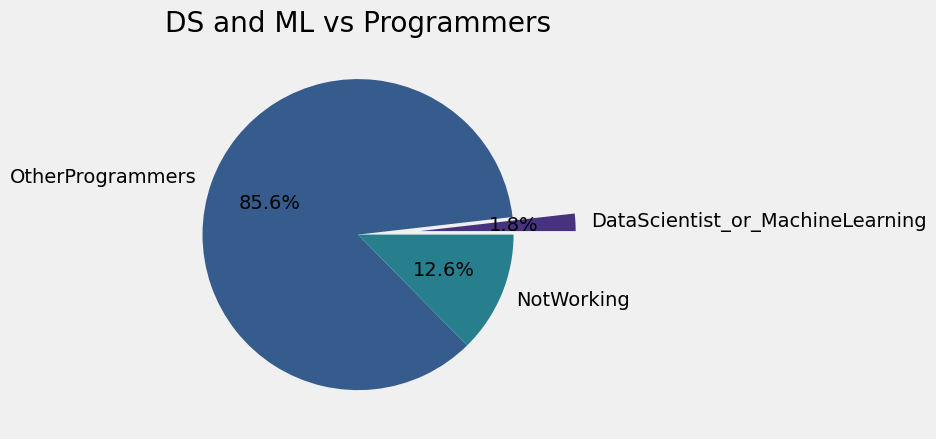

In [7]:
ds_vs_programmers = ['DataScientist_or_MachineLearning','OtherProgrammers', 'NotWorking']
sizes = (len(ML_df), (len(df)-len(ML_df)-NotWorking), NotWorking)
explode = (0.4, 0, 0)
plt.pie(sizes, labels=ds_vs_programmers, explode=explode, autopct='%1.1f%%')
plt.title('DS and ML vs Programmers')
plt.show()

I want to work with this little percentage of people. The number looks bad in the graph tbh

In [8]:
ML_df.head()

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,RemoteWork,TargetAIDeveloper,TargetAISearch,TargetCollabTools,TargetDatabase,TargetFramework,TargetLanguage,TargetLibraries,TargetPlatform,TargetTools,WorkedAIDeveloper,WorkedAISearch,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
21,25-34 years old,Start a free trial;Ask developers I know/work ...,Germany,NaN,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",NaN,"I am not primarily a developer, but I write co...",Other Linux-based,Windows;Windows Subsystem for Linux (WSL),None of these,Remote,NaN,NaN,Geany;Spyder,MariaDB;PostgreSQL;Redis;Snowflake;SQLite,NaN,Bash/Shell (all shells);Delphi;PHP;Python;Rust...,Apache Kafka;Apache Spark;CUDA;NumPy;Pandas;Sc...,NaN,APT;LLVM's Clang;Pip;Puppet,NaN,ChatGPT;WolframAlpha,Geany;Notepad++;Spyder,MariaDB;PostgreSQL;SQLite,NaN,Bash/Shell (all shells);Delphi;HTML/CSS;PHP;Po...,NumPy;Pandas,NaN,APT;LLVM's Clang;Maven (build tool);Pip,5.0,85672.0,20.0,5.0,NaN,NaN,NaN,"No, and I don't plan to"
164,18-24 years old,Start a free trial;Ask developers I know/work ...,Canada,Udemy;Coursera,Data scientist or machine learning specialist,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,Ubuntu,Ubuntu,Microservices,"Hybrid (some remote, some in-person)",NaN,ChatGPT,CLion;PyCharm,Cassandra;MySQL;Oracle;Redis;SQLite,NaN,C;C++;Python,CUDA;Keras;NumPy;Opencv;Qt;TensorFlow;Torch/Py...,Amazon Web Services (AWS),CMake;Docker;GNU GCC;LLVM's Clang;Ninja,NaN,ChatGPT;WolframAlpha;You.com,CLion;PhpStorm;PyCharm;Spyder;Vim,Cassandra;MySQL;Oracle;Redis;SQLite,Django;FastAPI;Flask,C;C++;HTML/CSS;JavaScript;Python;TypeScript,CUDA;Keras;NumPy;Opencv;OpenGL;Pandas;Qt;Tenso...,Amazon Web Services (AWS),CMake;Docker;GNU GCC;LLVM's Clang;Ninja;npm,7.0,52046.0,7.0,5.0,Increase productivity;Greater efficiency;Speed...,Very favorable,Somewhat trust,Yes
189,35-44 years old,Start a free trial;Visit developer communities...,Cyprus,Codecademy;Coursera,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,Ubuntu;Windows,Ubuntu;Windows,Microservices;Observability tools;Developer po...,"Hybrid (some remote, some in-person)",NaN,ChatGPT,DataGrip;IntelliJ IDEA;Jupyter Notebook/Jupyte...,PostgreSQL,FastAPI,Bash/Shell (all shells);HTML/CSS;Python;R;SQL,Apache Spark;Keras;NumPy;Pandas;Scikit-Learn;T...,Amazon Web Services (AWS),Docker;Kubernetes;Pip,NaN,ChatGPT,DataGrip;IntelliJ IDEA;Jupyter Notebook/Jupyte...,Microsoft SQL Server;MySQL;Oracle;PostgreSQL,FastAPI,Bash/Shell (all shells);C#;HTML/CSS;MATLAB;Pyt...,Apache Kafka;Apache Spark;Hadoop;Keras;NumPy;P...,Amazon Web Services (AWS);Google Cloud;Microso...,Docker;Kubernetes;Pip,16.0,74963.0,8.0,8.0,Increase productivity;Greater efficiency;Impro...,Favorable,Somewhat trust,Yes
208,25-34 years old,Start a free trial;Visit developer communities...,Turkey,Udemy;Coursera,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",Healthcare,"I am not primarily a developer, but I write co...",iOS;MacOS;Windows,iOS;iPadOS;MacOS;Windows,None of these,In-person,NaN,ChatGPT,CLion;Eclipse;IntelliJ IDEA;IPython;Jupyter No...,Microsoft SQL Server;MongoDB;MySQL;Oracle;Post...,AngularJS;Django;FastAPI;Flask;jQuery;Next.js;...,JavaScript;Python;R;Swift,Apache Kafka;Apache Spark;Flutter;Hadoop;Huggi...,NaN,Docker;Homebrew;Kubernetes;npm;Pip;Visual Stud...,NaN,ChatGPT,Atom;PyCharm;RStudio;Spyder;Visual Studio Code...,Microsoft SQL Server;MySQL;SQLite,Node.js

In [9]:
ML_df['WorkedLanguage'].value_counts()

WorkedLanguage
Python                                                                   157
Python;SQL                                                                95
Python;R;SQL                                                              49
Bash/Shell (all shells);Python;SQL                                        39
Bash/Shell (all shells);Python                                            37
                                                                        ... 
Julia;Python                                                               1
Bash/Shell (all shells);C++;JavaScript;Perl;Python;SQL                     1
Python;SAS;VBA                                                             1
Bash/Shell (all shells);C++;HTML/CSS;Java;Julia;PowerShell;Python;SQL      1
C;HTML/CSS;Java;MATLAB;PHP;Python;Scala;SQL                                1
Name: count, Length: 853, dtype: int64

Almost all of them are working with Python! What happened to those who know 'R'?

In [10]:
ML_notPython = ML_df[~ML_df['WorkedLanguage'].str.contains('Python',na=False)]
ML_notPython['WorkedLanguage'].value_counts()

WorkedLanguage
R;SQL                           10
R                                8
R;SAS;SQL                        4
C++;R                            3
JavaScript;TypeScript            2
                                ..
Java;SQL;Visual Basic (.Net)     1
Clojure;Java                     1
C++;MATLAB;SQL                   1
Julia;R;SQL                      1
Lua;R;Rust;SQL                   1
Name: count, Length: 68, dtype: int64

In [11]:
print(ML_df['YearlySalary'].median())
print(ML_notPython['YearlySalary'].median())

80317.0
87755.5



The few people who is still working with R are gaining almost the same, I think that's why they don't change, but I think the market will force them to learn it or they will disappear

In [12]:
ML_df.head()

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,RemoteWork,TargetAIDeveloper,TargetAISearch,TargetCollabTools,TargetDatabase,TargetFramework,TargetLanguage,TargetLibraries,TargetPlatform,TargetTools,WorkedAIDeveloper,WorkedAISearch,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
21,25-34 years old,Start a free trial;Ask developers I know/work ...,Germany,NaN,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",NaN,"I am not primarily a developer, but I write co...",Other Linux-based,Windows;Windows Subsystem for Linux (WSL),None of these,Remote,NaN,NaN,Geany;Spyder,MariaDB;PostgreSQL;Redis;Snowflake;SQLite,NaN,Bash/Shell (all shells);Delphi;PHP;Python;Rust...,Apache Kafka;Apache Spark;CUDA;NumPy;Pandas;Sc...,NaN,APT;LLVM's Clang;Pip;Puppet,NaN,ChatGPT;WolframAlpha,Geany;Notepad++;Spyder,MariaDB;PostgreSQL;SQLite,NaN,Bash/Shell (all shells);Delphi;HTML/CSS;PHP;Po...,NumPy;Pandas,NaN,APT;LLVM's Clang;Maven (build tool);Pip,5.0,85672.0,20.0,5.0,NaN,NaN,NaN,"No, and I don't plan to"
164,18-24 years old,Start a free trial;Ask developers I know/work ...,Canada,Udemy;Coursera,Data scientist or machine learning specialist,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,Ubuntu,Ubuntu,Microservices,"Hybrid (some remote, some in-person)",NaN,ChatGPT,CLion;PyCharm,Cassandra;MySQL;Oracle;Redis;SQLite,NaN,C;C++;Python,CUDA;Keras;NumPy;Opencv;Qt;TensorFlow;Torch/Py...,Amazon Web Services (AWS),CMake;Docker;GNU GCC;LLVM's Clang;Ninja,NaN,ChatGPT;WolframAlpha;You.com,CLion;PhpStorm;PyCharm;Spyder;Vim,Cassandra;MySQL;Oracle;Redis;SQLite,Django;FastAPI;Flask,C;C++;HTML/CSS;JavaScript;Python;TypeScript,CUDA;Keras;NumPy;Opencv;OpenGL;Pandas;Qt;Tenso...,Amazon Web Services (AWS),CMake;Docker;GNU GCC;LLVM's Clang;Ninja;npm,7.0,52046.0,7.0,5.0,Increase productivity;Greater efficiency;Speed...,Very favorable,Somewhat trust,Yes
189,35-44 years old,Start a free trial;Visit developer communities...,Cyprus,Codecademy;Coursera,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,Ubuntu;Windows,Ubuntu;Windows,Microservices;Observability tools;Developer po...,"Hybrid (some remote, some in-person)",NaN,ChatGPT,DataGrip;IntelliJ IDEA;Jupyter Notebook/Jupyte...,PostgreSQL,FastAPI,Bash/Shell (all shells);HTML/CSS;Python;R;SQL,Apache Spark;Keras;NumPy;Pandas;Scikit-Learn;T...,Amazon Web Services (AWS),Docker;Kubernetes;Pip,NaN,ChatGPT,DataGrip;IntelliJ IDEA;Jupyter Notebook/Jupyte...,Microsoft SQL Server;MySQL;Oracle;PostgreSQL,FastAPI,Bash/Shell (all shells);C#;HTML/CSS;MATLAB;Pyt...,Apache Kafka;Apache Spark;Hadoop;Keras;NumPy;P...,Amazon Web Services (AWS);Google Cloud;Microso...,Docker;Kubernetes;Pip,16.0,74963.0,8.0,8.0,Increase productivity;Greater efficiency;Impro...,Favorable,Somewhat trust,Yes
208,25-34 years old,Start a free trial;Visit developer communities...,Turkey,Udemy;Coursera,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",Healthcare,"I am not primarily a developer, but I write co...",iOS;MacOS;Windows,iOS;iPadOS;MacOS;Windows,None of these,In-person,NaN,ChatGPT,CLion;Eclipse;IntelliJ IDEA;IPython;Jupyter No...,Microsoft SQL Server;MongoDB;MySQL;Oracle;Post...,AngularJS;Django;FastAPI;Flask;jQuery;Next.js;...,JavaScript;Python;R;Swift,Apache Kafka;Apache Spark;Flutter;Hadoop;Huggi...,NaN,Docker;Homebrew;Kubernetes;npm;Pip;Visual Stud...,NaN,ChatGPT,Atom;PyCharm;RStudio;Spyder;Visual Studio Code...,Microsoft SQL Server;MySQL;SQLite,Node.js

In [13]:
ML_df['CoursesCert'].value_counts()

CoursesCert
Coursera                                       117
Udemy;Coursera                                 113
Udemy                                           56
Other                                           45
edX;Coursera                                    35
                                              ... 
edX;Pluralsight;Coursera;Skillsoft               1
Codecademy;Udemy;Udacity                         1
Other;edX;Udemy                                  1
Other;Codecademy;Udemy;Pluralsight;Coursera      1
Udemy;Udacity;Skillsoft                          1
Name: count, Length: 85, dtype: int64

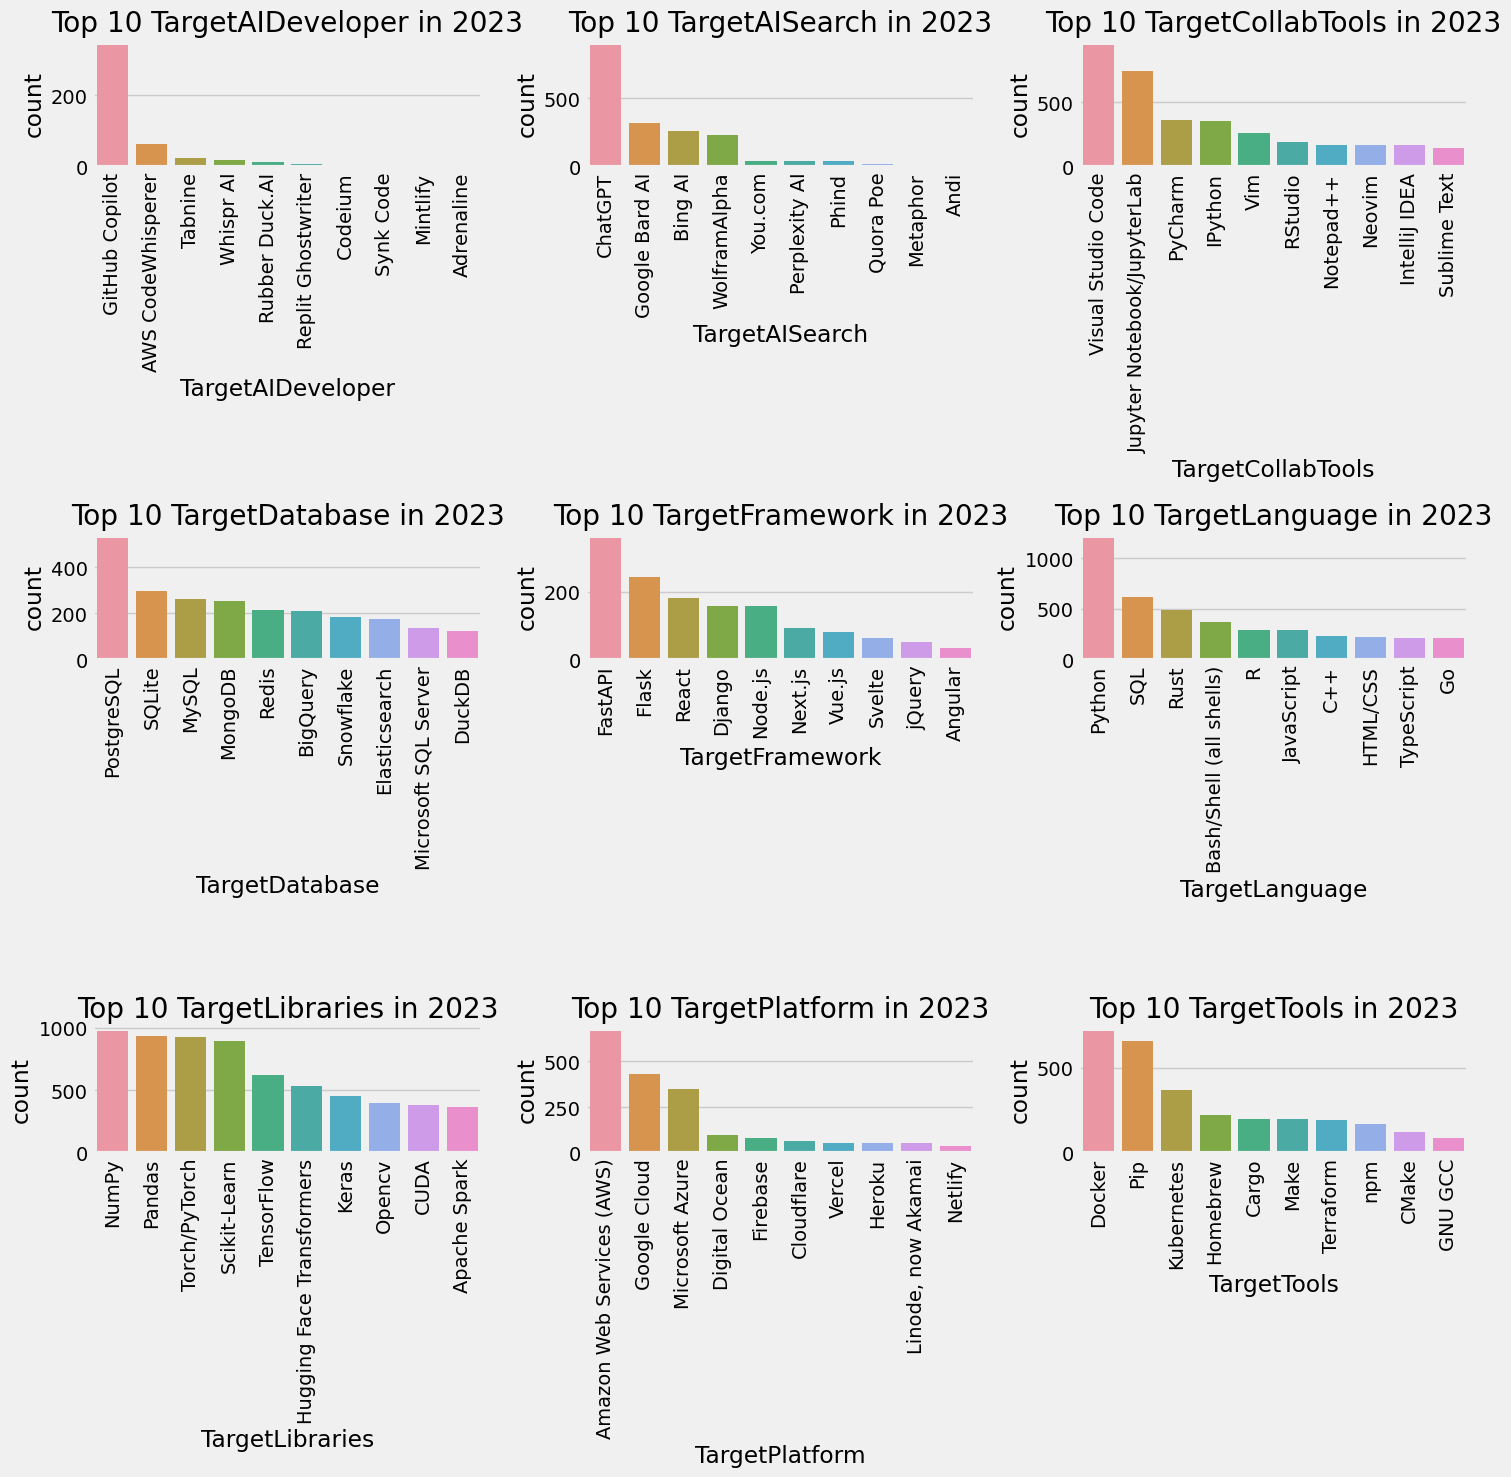

In [14]:
Target_things = ['TargetAIDeveloper', 'TargetAISearch', 'TargetCollabTools', 'TargetDatabase', 'TargetFramework', 'TargetLanguage', 'TargetLibraries', 'TargetPlatform', 'TargetTools']

def plot_top(column_name, ax):
    df_exploded = column_name.str.split(';').explode()
    graph = df_exploded.value_counts().nlargest(10)
    sns.barplot(x=graph.index, y=graph, ax=ax)
    ax.set_title(f'Top {len(graph)} {column_name.name} in 2023')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Create the 3x3 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Loop through the columns_list and call the plot_top() function for each column
for ax, column in zip(axs.flat, Target_things):
    plot_top(ML_df[column], ax)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

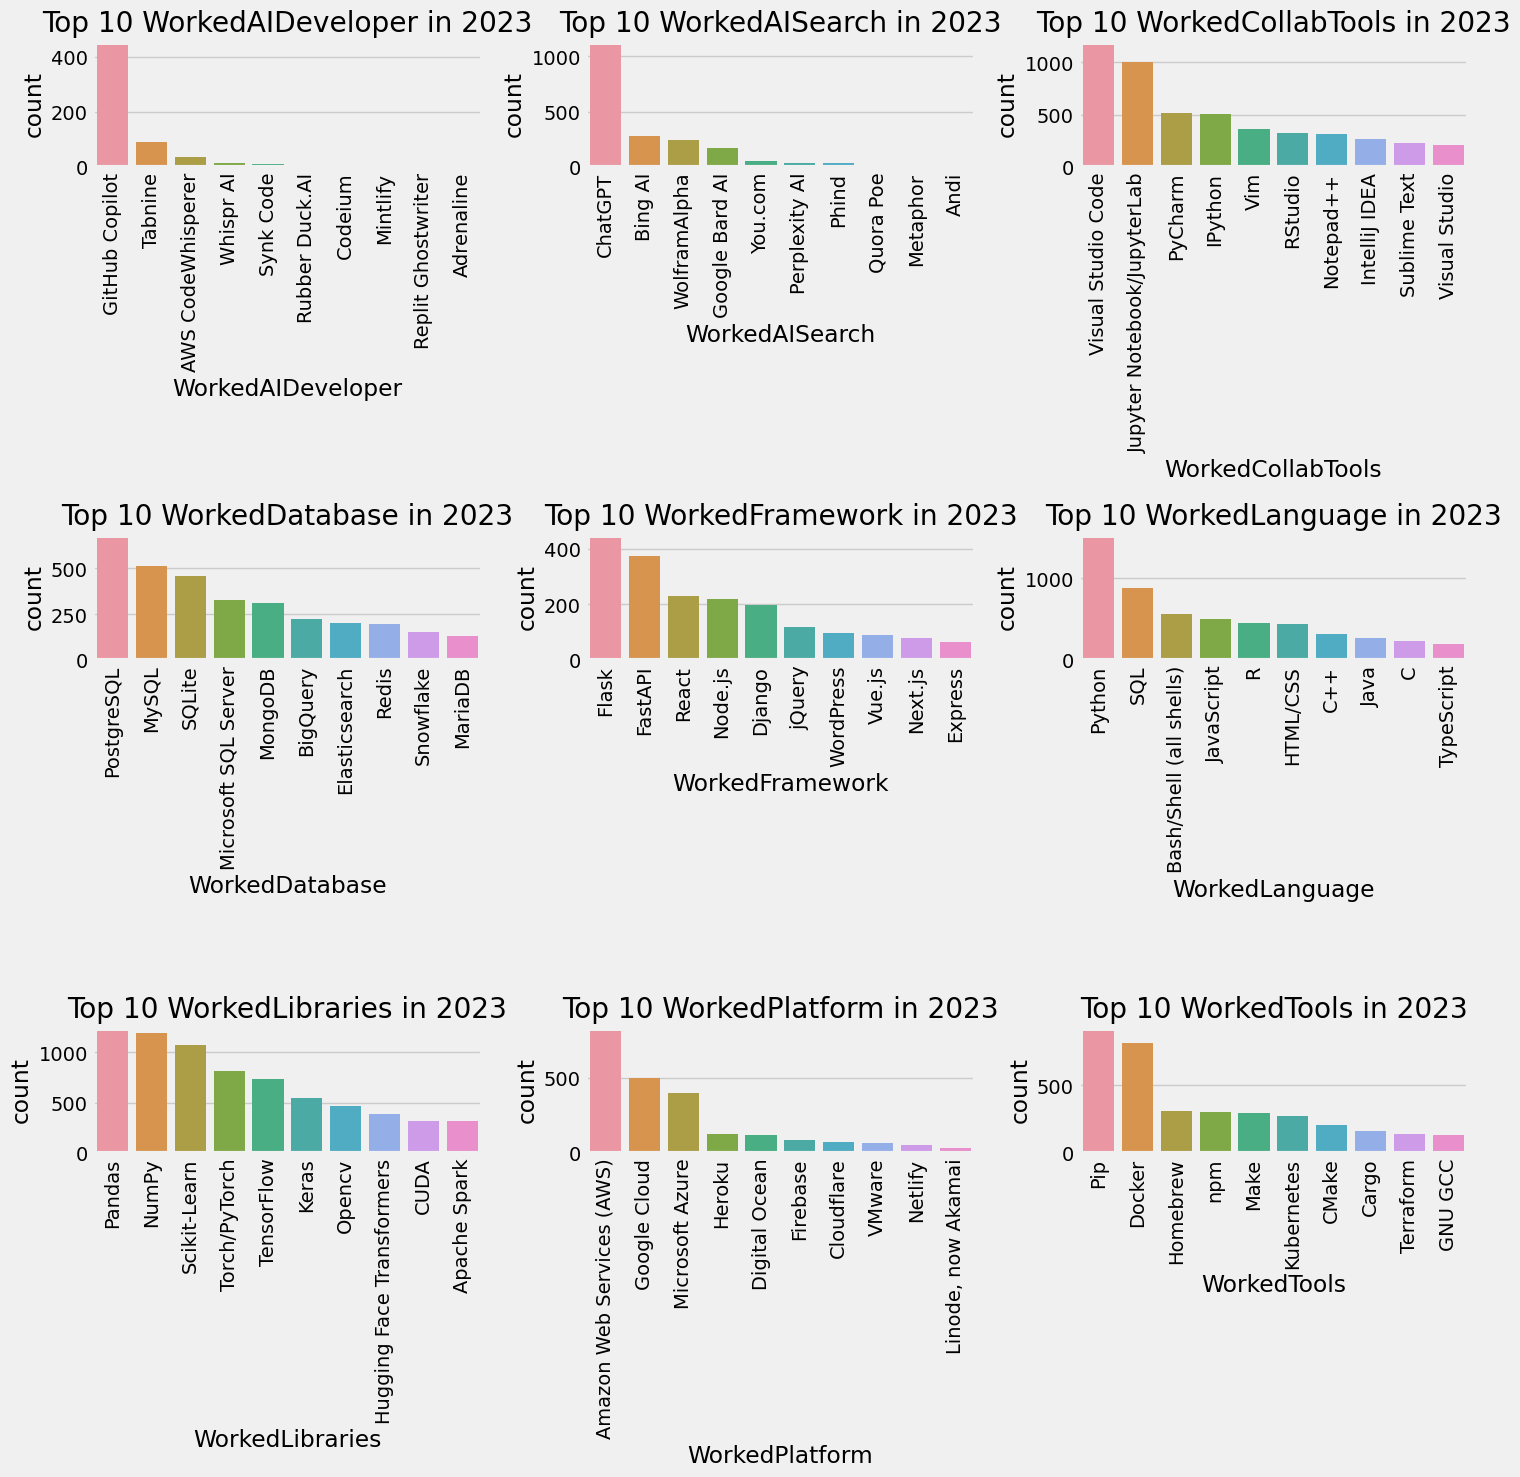

In [15]:
Worked_things = ['WorkedAIDeveloper', 'WorkedAISearch', 'WorkedCollabTools', 'WorkedDatabase', 'WorkedFramework', 'WorkedLanguage', 'WorkedLibraries', 'WorkedPlatform', 'WorkedTools']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for ax, column in zip(axs.flat, Worked_things):
    plot_top(ML_df[column], ax)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


My principal question looking this graphs is: 
**What's FastAPI and why the people want to learn it more than Flask?**

> FastAPI is a modern, high-performance web framework for building APIs (Application Programming Interfaces) with Python. It is designed to be fast, easy to use, and efficient, making it an excellent choice for developing web applications and microservices that require quick response times.

Perfect. I must learn it too. I've some priorities rn, but I will, I promise.

In [16]:
ML_df.head()

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,RemoteWork,TargetAIDeveloper,TargetAISearch,TargetCollabTools,TargetDatabase,TargetFramework,TargetLanguage,TargetLibraries,TargetPlatform,TargetTools,WorkedAIDeveloper,WorkedAISearch,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
21,25-34 years old,Start a free trial;Ask developers I know/work ...,Germany,NaN,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",NaN,"I am not primarily a developer, but I write co...",Other Linux-based,Windows;Windows Subsystem for Linux (WSL),None of these,Remote,NaN,NaN,Geany;Spyder,MariaDB;PostgreSQL;Redis;Snowflake;SQLite,NaN,Bash/Shell (all shells);Delphi;PHP;Python;Rust...,Apache Kafka;Apache Spark;CUDA;NumPy;Pandas;Sc...,NaN,APT;LLVM's Clang;Pip;Puppet,NaN,ChatGPT;WolframAlpha,Geany;Notepad++;Spyder,MariaDB;PostgreSQL;SQLite,NaN,Bash/Shell (all shells);Delphi;HTML/CSS;PHP;Po...,NumPy;Pandas,NaN,APT;LLVM's Clang;Maven (build tool);Pip,5.0,85672.0,20.0,5.0,NaN,NaN,NaN,"No, and I don't plan to"
164,18-24 years old,Start a free trial;Ask developers I know/work ...,Canada,Udemy;Coursera,Data scientist or machine learning specialist,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,Ubuntu,Ubuntu,Microservices,"Hybrid (some remote, some in-person)",NaN,ChatGPT,CLion;PyCharm,Cassandra;MySQL;Oracle;Redis;SQLite,NaN,C;C++;Python,CUDA;Keras;NumPy;Opencv;Qt;TensorFlow;Torch/Py...,Amazon Web Services (AWS),CMake;Docker;GNU GCC;LLVM's Clang;Ninja,NaN,ChatGPT;WolframAlpha;You.com,CLion;PhpStorm;PyCharm;Spyder;Vim,Cassandra;MySQL;Oracle;Redis;SQLite,Django;FastAPI;Flask,C;C++;HTML/CSS;JavaScript;Python;TypeScript,CUDA;Keras;NumPy;Opencv;OpenGL;Pandas;Qt;Tenso...,Amazon Web Services (AWS),CMake;Docker;GNU GCC;LLVM's Clang;Ninja;npm,7.0,52046.0,7.0,5.0,Increase productivity;Greater efficiency;Speed...,Very favorable,Somewhat trust,Yes
189,35-44 years old,Start a free trial;Visit developer communities...,Cyprus,Codecademy;Coursera,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time","Information Services, IT, Software Development...",I am a developer by profession,Ubuntu;Windows,Ubuntu;Windows,Microservices;Observability tools;Developer po...,"Hybrid (some remote, some in-person)",NaN,ChatGPT,DataGrip;IntelliJ IDEA;Jupyter Notebook/Jupyte...,PostgreSQL,FastAPI,Bash/Shell (all shells);HTML/CSS;Python;R;SQL,Apache Spark;Keras;NumPy;Pandas;Scikit-Learn;T...,Amazon Web Services (AWS),Docker;Kubernetes;Pip,NaN,ChatGPT,DataGrip;IntelliJ IDEA;Jupyter Notebook/Jupyte...,Microsoft SQL Server;MySQL;Oracle;PostgreSQL,FastAPI,Bash/Shell (all shells);C#;HTML/CSS;MATLAB;Pyt...,Apache Kafka;Apache Spark;Hadoop;Keras;NumPy;P...,Amazon Web Services (AWS);Google Cloud;Microso...,Docker;Kubernetes;Pip,16.0,74963.0,8.0,8.0,Increase productivity;Greater efficiency;Impro...,Favorable,Somewhat trust,Yes
208,25-34 years old,Start a free trial;Visit developer communities...,Turkey,Udemy;Coursera,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",Healthcare,"I am not primarily a developer, but I write co...",iOS;MacOS;Windows,iOS;iPadOS;MacOS;Windows,None of these,In-person,NaN,ChatGPT,CLion;Eclipse;IntelliJ IDEA;IPython;Jupyter No...,Microsoft SQL Server;MongoDB;MySQL;Oracle;Post...,AngularJS;Django;FastAPI;Flask;jQuery;Next.js;...,JavaScript;Python;R;Swift,Apache Kafka;Apache Spark;Flutter;Hadoop;Huggi...,NaN,Docker;Homebrew;Kubernetes;npm;Pip;Visual Stud...,NaN,ChatGPT,Atom;PyCharm;RStudio;Spyder;Visual Studio Code...,Microsoft SQL Server;MySQL;SQLite,Node.js

In [17]:
ML_df['OSProffesional'].value_counts().nlargest()

OSProffesional
Windows           247
MacOS             210
Ubuntu            148
MacOS;Ubuntu      100
Ubuntu;Windows     94
Name: count, dtype: int64

In [18]:
ML_OS = ML_df['OSProffesional'].str.split(';').explode()

In [19]:
ML_OS.value_counts()

OSProffesional
Windows                              731
Ubuntu                               638
MacOS                                524
Windows Subsystem for Linux (WSL)    271
Other Linux-based                    135
Debian                               124
Red Hat                               68
iOS                                   61
Android                               48
Arch                                  48
Fedora                                26
iPadOS                                25
Other (Please Specify):               23
ChromeOS                              16
Cygwin                                13
Solaris                                8
BSD                                    6
AIX                                    6
Haiku                                  1
Name: count, dtype: int64

OMG, For Data scientists, linux is winning the race!!

Im actually using Ubuntu an MacOS, and both of them are very easy to work if you know basic commands on terminal